In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch historical data
ticker = 'AAPL'
data = yf.download(ticker, start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [2]:
# Data Cleaning and Preprocessing
data.fillna(method='ffill', inplace=True)
data.index = pd.to_datetime(data.index)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048050,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998451,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560852,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086548,70790800


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

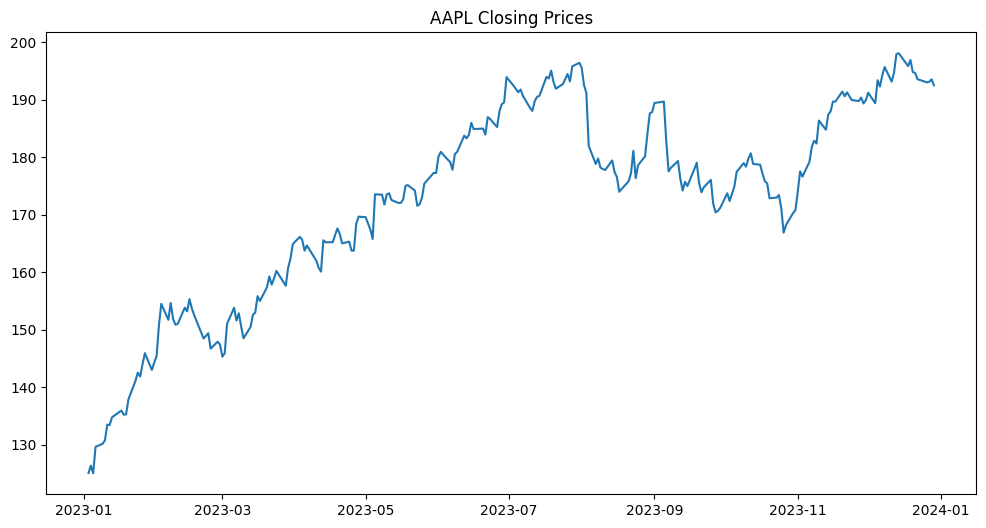

In [3]:
# Initial Exploratory Analysis
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('AAPL Closing Prices')
plt.show()

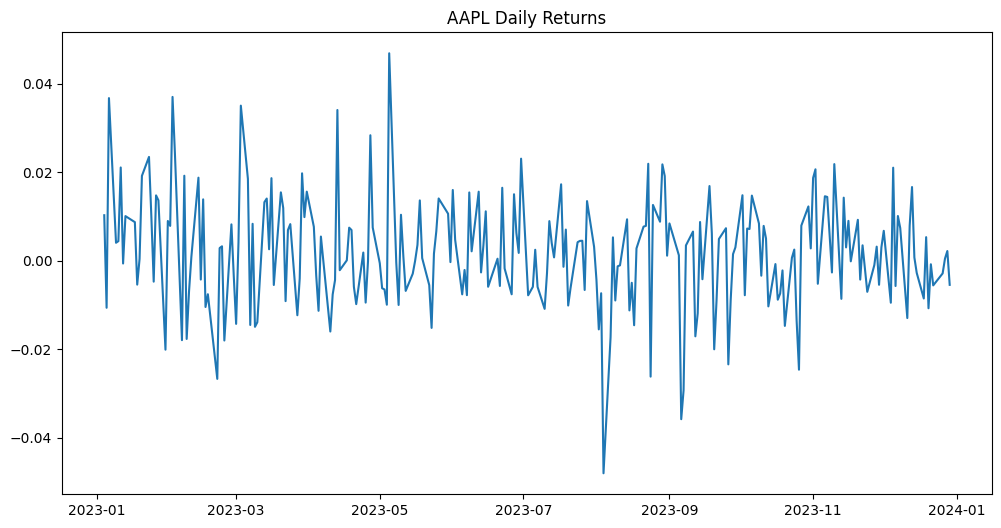

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'].pct_change())
plt.title('AAPL Daily Returns')
plt.show()


             Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   172.256681  173.857520  170.981880  172.549000  171.668915   
std     17.530359   17.261055   17.535099   17.331672   17.458137   
min    126.010002  127.769997  124.169998  125.019997  123.998451   
25%    161.555000  162.387501  160.699997  162.112499  161.033356   
50%    175.244995  177.025002  173.840004  175.475006  174.783730   
75%    186.805000  188.095001  185.174995  187.330002  186.686100   
max    198.020004  199.619995  197.000000  198.110001  197.589523   

             Volume  
count  2.500000e+02  
mean   5.921703e+07  
std    1.777392e+07  
min    2.404830e+07  
25%    4.781208e+07  
50%    5.507750e+07  
75%    6.574292e+07  
max    1.543573e+08  


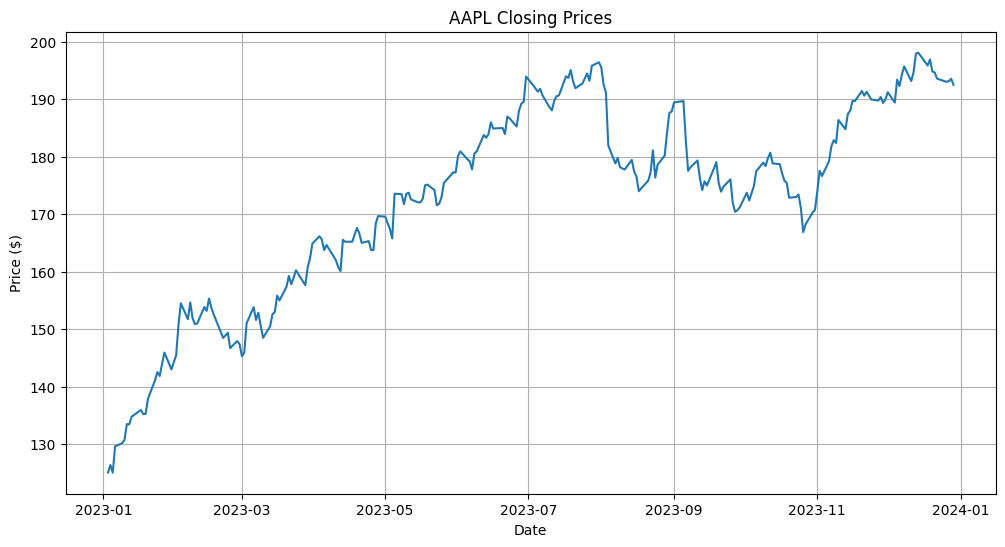

In [5]:
import calendar
print(data.describe())

# Time Series Plot of Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('AAPL Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

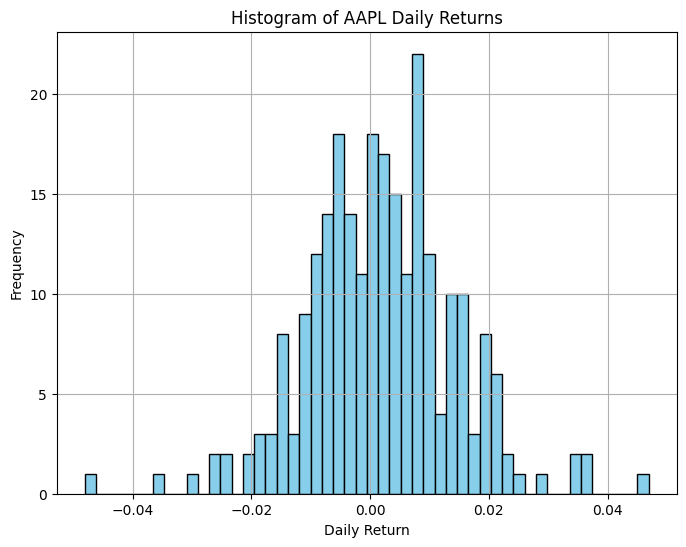

In [6]:
# Histogram of Daily Returns
plt.figure(figsize=(8, 6))
plt.hist(data['Close'].pct_change().dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of AAPL Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

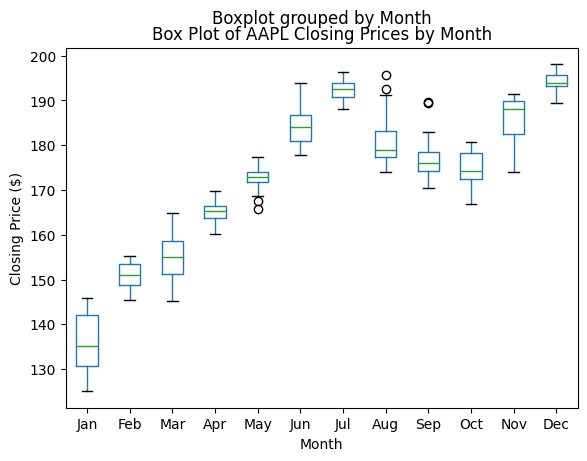

In [7]:
# Box Plot of Closing Prices by Month
data['Month'] = data.index.month
plt.figure(figsize=(12, 6))
data.boxplot(column='Close', by='Month', grid=False)
plt.title('Box Plot of AAPL Closing Prices by Month')
plt.xlabel('Month')
plt.ylabel('Closing Price ($)')
plt.xticks(range(1, 13), calendar.month_abbr[1:13])
plt.show()



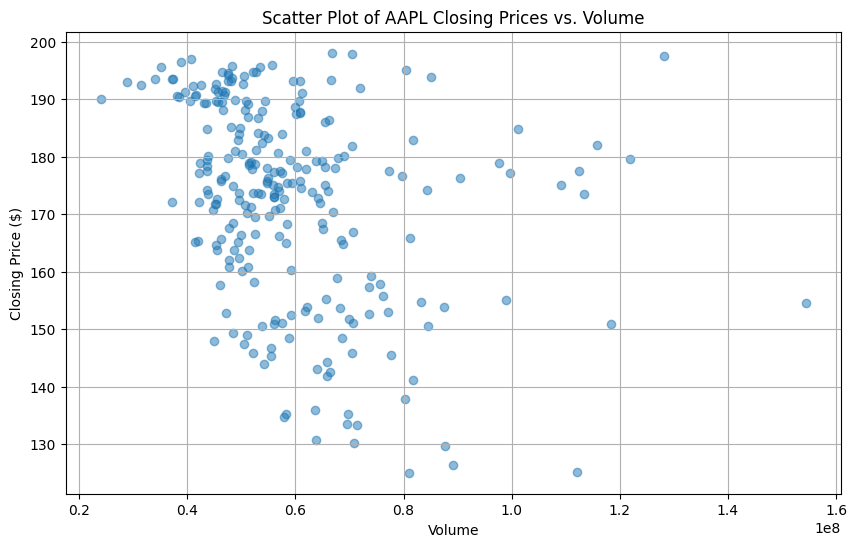

In [8]:
# Scatter Plot of Closing Prices vs. Volume
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Close'], alpha=0.5)
plt.title('Scatter Plot of AAPL Closing Prices vs. Volume')
plt.xlabel('Volume')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.show()

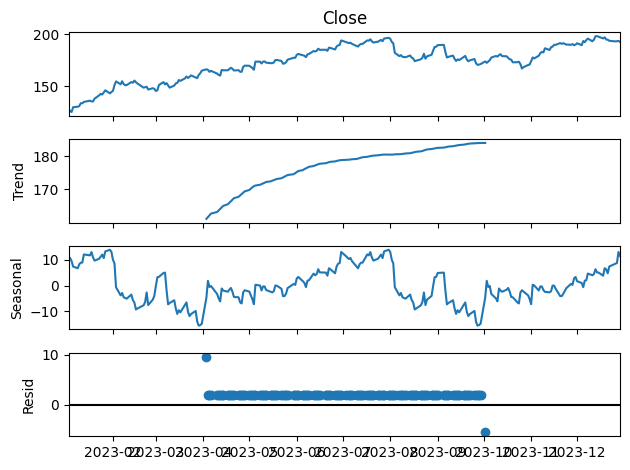

In [9]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Adjust the period parameter
period = 125  # Approximating half the number of trading days in a year
decomposition = seasonal_decompose(data['Close'], model='additive', period=period)
decomposition.plot()
plt.show()


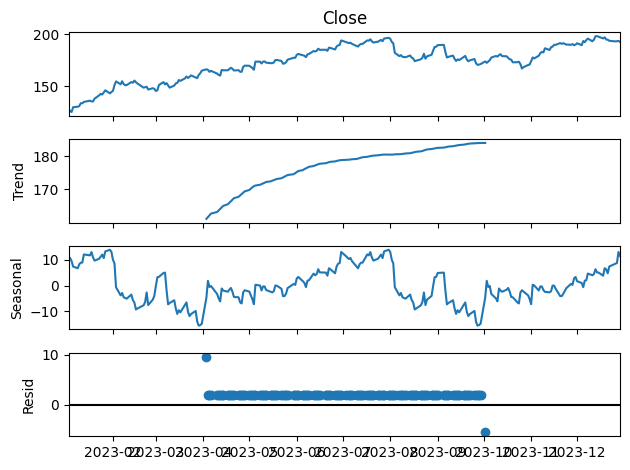

In [10]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Adjust the period parameter
period = 125  # Approximating half the number of trading days in a year
decomposition = seasonal_decompose(data['Close'], model='additive', period=period)
decomposition.plot()
plt.show()


In [11]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Check for stationarity
if result[1] > 0.05:
    print('ADF test indicates that the data is not stationary.')
else:
    print('ADF test indicates that the data is stationary.')

# If the data is not stationary, apply transformations
if result[1] > 0.05:
    # Apply transformations here, such as differencing or log transformation
    # Example: Differencing
    data['Close_diff'] = data['Close'].diff()
    # Re-run the ADF test on the transformed data
    result_diff = adfuller(data['Close_diff'].dropna())
    print('\nAfter differencing:')
    print('ADF Statistic:', result_diff[0])
    print('p-value:', result_diff[1])
    print('Critical Values:', result_diff[4])


ADF Statistic: -2.6034730008848106
p-value: 0.09228159120356572
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}
ADF test indicates that the data is not stationary.

After differencing:
ADF Statistic: -14.744057983380218
p-value: 2.5443509763814487e-27
Critical Values: {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}


In [13]:
!pip install pmdarima
!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.9 MB/s eta 0:00:00


In [14]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
train_size = int(len(data) * 0.8)  # 80% for training, 20% for testing
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# ARIMA model
arima_model = auto_arima(train_data['Close'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
arima_order = arima_model.order

# SARIMA model
sarima_model = auto_arima(train_data['Close'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
sarima_order = sarima_model.order
sarima_seasonal_order = sarima_model.seasonal_order

# Prophet model
prophet_model = Prophet()
train_prophet = train_data.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})

# Train the models
# ARIMA
arima_model_fit = SARIMAX(train_data['Close'], order=arima_order).fit(disp=False)
# SARIMA
sarima_model_fit = SARIMAX(train_data['Close'], order=sarima_order, seasonal_order=sarima_seasonal_order, enforce_stationarity=False).fit(disp=False)
# Prophet
prophet_model_fit = prophet_model.fit(train_prophet)

# Validate the models on the testing data
# ARIMA
arima_forecast = arima_model_fit.forecast(steps=len(test_data))
# SARIMA
sarima_forecast = sarima_model_fit.forecast(steps=len(test_data))
# Prophet
future = prophet_model.make_future_dataframe(periods=len(test_data), freq='D')
prophet_forecast = prophet_model_fit.predict(future)

# Align Prophet forecast data with test data
prophet_forecast = prophet_forecast.set_index('ds')
prophet_forecast = prophet_forecast[train_data.index[-1]:]

# Evaluate the performance of each model
# ARIMA
arima_rmse = mean_squared_error(test_data['Close'], arima_forecast, squared=False)
arima_mae = mean_absolute_error(test_data['Close'], arima_forecast)
# SARIMA
sarima_rmse = mean_squared_error(test_data['Close'], sarima_forecast, squared=False)
sarima_mae = mean_absolute_error(test_data['Close'], sarima_forecast)
# Prophet
prophet_rmse = mean_squared_error(test_data['Close'], prophet_forecast['yhat'][-len(test_data):], squared=False)
prophet_mae = mean_absolute_error(test_data['Close'], prophet_forecast['yhat'][-len(test_data):])

# Select the best-performing model
rmse_scores = {'ARIMA': arima_rmse, 'SARIMA': sarima_rmse, 'Prophet': prophet_rmse}
mae_scores = {'ARIMA': arima_mae, 'SARIMA': sarima_mae, 'Prophet': prophet_mae}

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=885.111, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=880.117, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=880.691, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=880.531, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=880.808, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=881.140, Time=0.38 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.697 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=4.94 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=880.117, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=880.373, Time=0.43 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=879.813, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=880.808, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=880.531, Time=0.16 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=879.898, Tim

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpruryne37/f383dol6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpruryne37/hn5crl50.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53918', 'data', 'file=/tmp/tmpruryne37/f383dol6.json', 'init=/tmp/tmpruryne37/hn5crl50.json', 'output', 'file=/tmp/tmpruryne37/prophet_model0vyb_7xk/prophet_model-20240603062107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:21:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:21:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


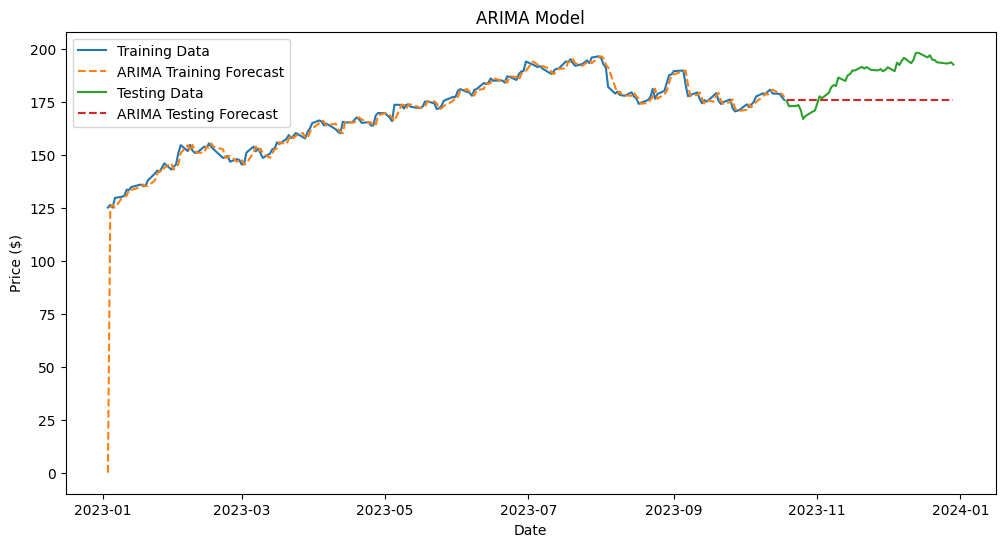

In [15]:
# Train ARIMA model
arima_model_fit = SARIMAX(train_data['Close'], order=arima_order).fit(disp=False)

# Forecast on training data
arima_train_forecast = arima_model_fit.predict(start=train_data.index[0], end=train_data.index[-1])

# Forecast on testing data
arima_test_forecast = arima_model_fit.forecast(steps=len(test_data))

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(train_data.index, arima_train_forecast, label='ARIMA Training Forecast', linestyle='--')
plt.plot(test_data.index, test_data['Close'], label='Testing Data')
plt.plot(test_data.index, arima_test_forecast, label='ARIMA Testing Forecast', linestyle='--')
plt.title('ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


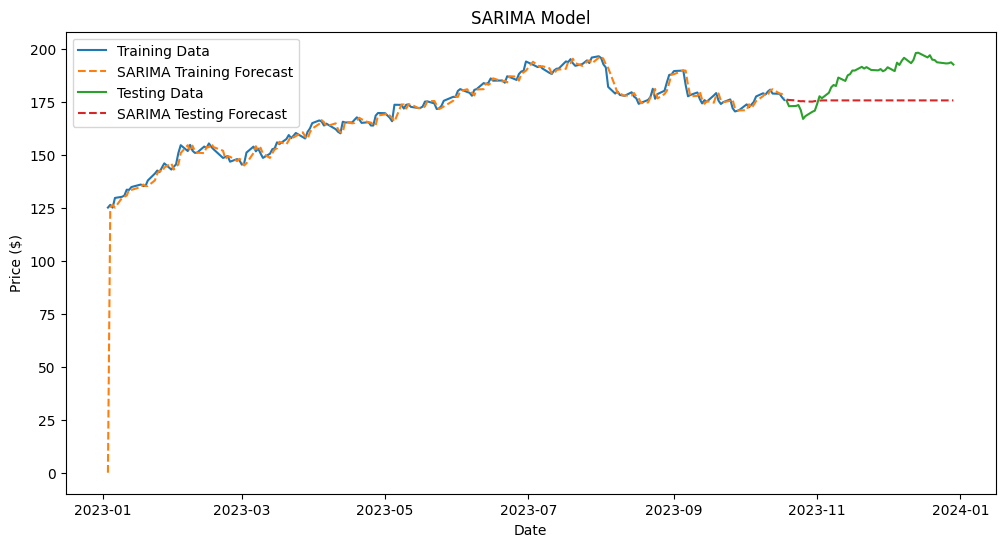

In [16]:
# Train SARIMA model
sarima_model_fit = SARIMAX(train_data['Close'], order=sarima_order, seasonal_order=sarima_seasonal_order, enforce_stationarity=False).fit(disp=False)

# Forecast on training data
sarima_train_forecast = sarima_model_fit.predict(start=train_data.index[0], end=train_data.index[-1])

# Forecast on testing data
sarima_test_forecast = sarima_model_fit.forecast(steps=len(test_data))

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(train_data.index, sarima_train_forecast, label='SARIMA Training Forecast', linestyle='--')
plt.plot(test_data.index, test_data['Close'], label='Testing Data')
plt.plot(test_data.index, sarima_test_forecast, label='SARIMA Testing Forecast', linestyle='--')
plt.title('SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpruryne37/pkd5d25h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpruryne37/8z05s_rx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64920', 'data', 'file=/tmp/tmpruryne37/pkd5d25h.json', 'init=/tmp/tmpruryne37/8z05s_rx.json', 'output', 'file=/tmp/tmpruryne37/prophet_modelyd136vt_/prophet_model-20240603062258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:22:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:22:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


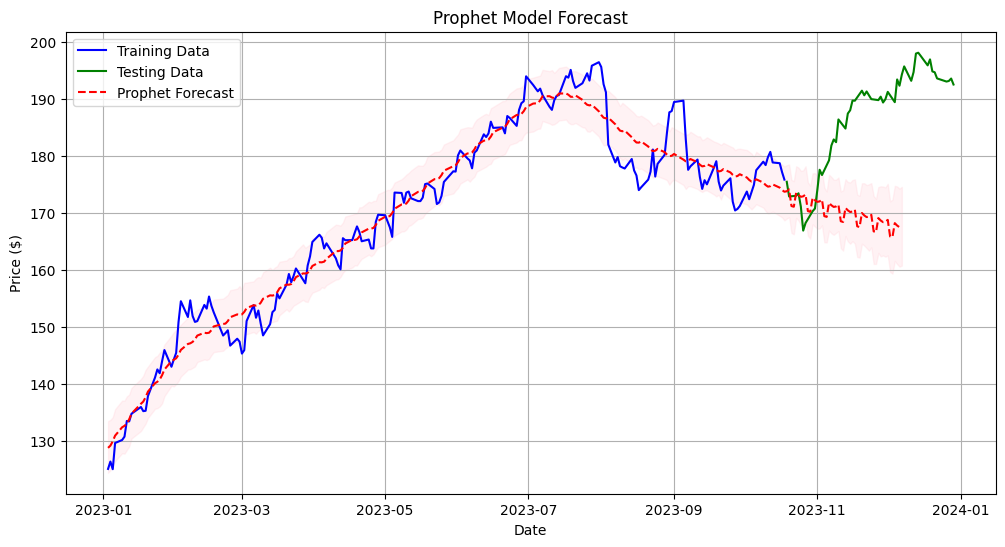

In [17]:
from prophet import Prophet

# Create a new Prophet model
prophet_model = Prophet()

# Train Prophet model
prophet_model_fit = prophet_model.fit(train_prophet)

# Forecast on testing data
future = prophet_model.make_future_dataframe(periods=len(test_data), freq='D')
prophet_forecast = prophet_model_fit.predict(future)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Testing Data', color='green')
plt.plot(prophet_forecast['ds'], prophet_forecast['yhat'], label='Prophet Forecast', linestyle='--', color='red')
plt.fill_between(prophet_forecast['ds'], prophet_forecast['yhat_lower'], prophet_forecast['yhat_upper'], color='pink', alpha=0.2)
plt.title('Prophet Model Forecast')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()
